In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/books.csv', on_bad_lines="skip")
data.head(3)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [4]:
data.index = data["bookID"]
data.sample()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
38585,38585,Small Bites Big Nights: Seductive Little Plat...,Govind Armstrong/Lisa Romerein/Tyler Florence,3.6,0307337936,9780307337931,eng,256,20,3,4/10/2007,Clarkson Potter


In [5]:
data.shape

(11123, 12)

In [6]:
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [7]:
data.isnull().sum()

,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


**Top 20 Books**

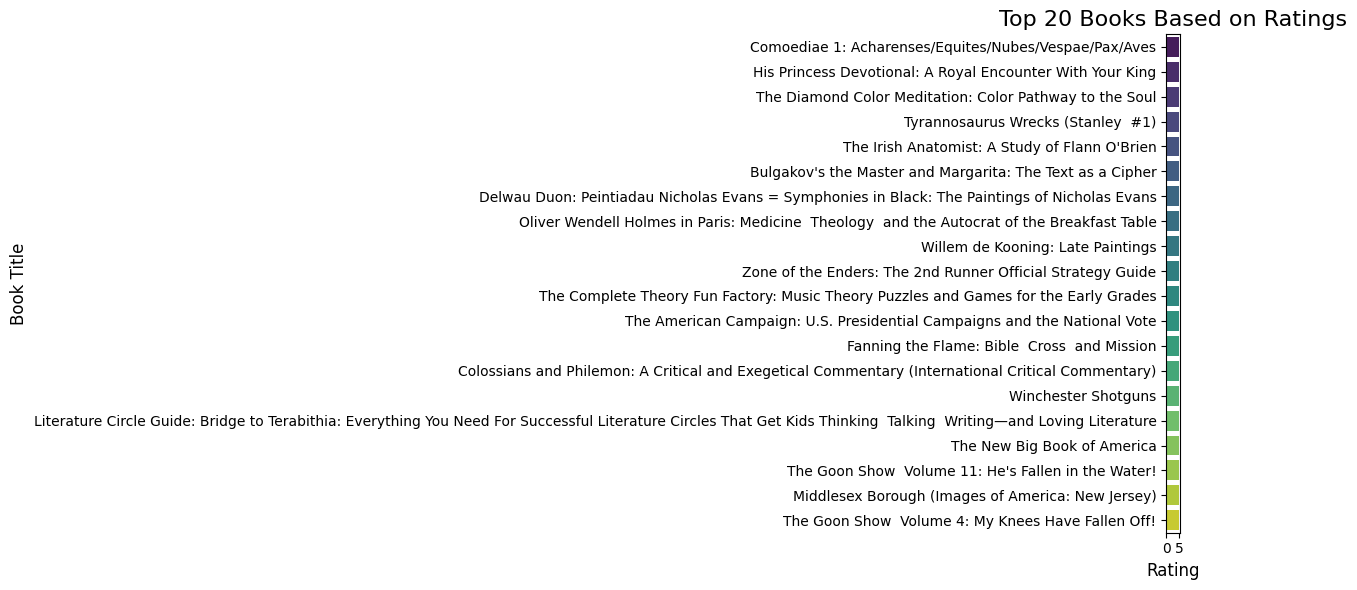

In [8]:

top_books = data.sort_values(by='average_rating', ascending=False).head(20)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_books['average_rating'], y=top_books['title'], palette='viridis')
plt.title('Top 20 Books Based on Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.tight_layout()
plt.show()

**Distribution of Languages**

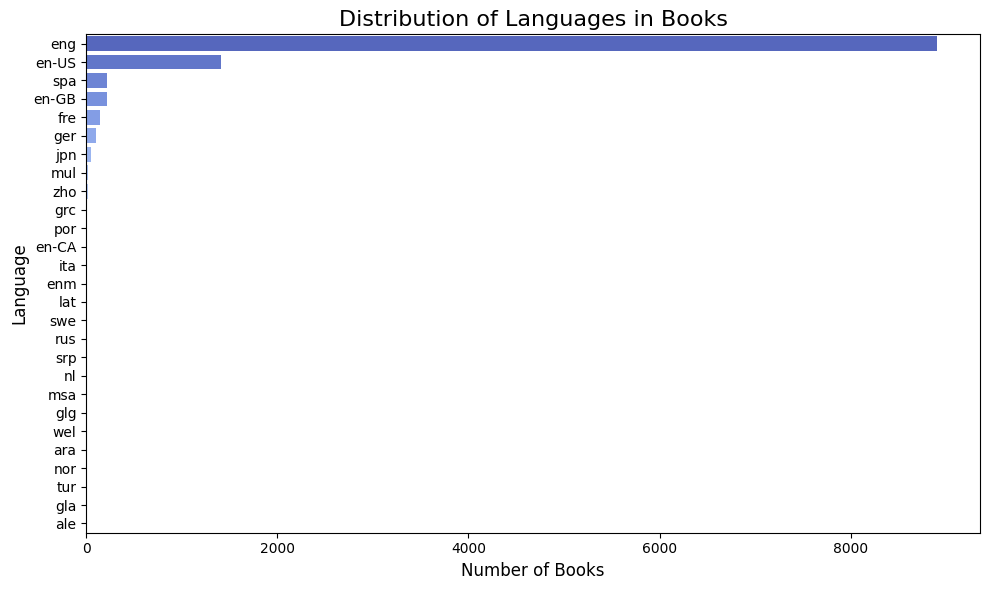

In [9]:

language_counts = data['language_code'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='coolwarm')
plt.title('Distribution of Languages in Books', fontsize=16)
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.tight_layout()
plt.show()


**Most Rated Books**

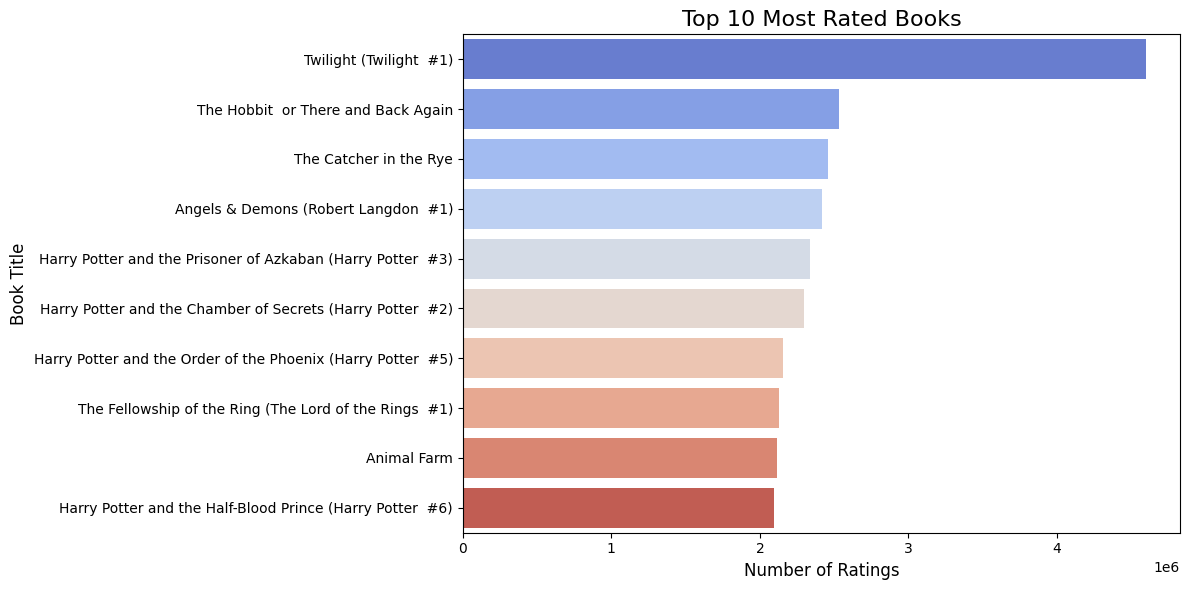

In [10]:

most_rated_books = data.sort_values(by='ratings_count', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=most_rated_books['ratings_count'], y=most_rated_books['title'], palette='coolwarm')
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.tight_layout()
plt.show()


**Highly Rated Authors**

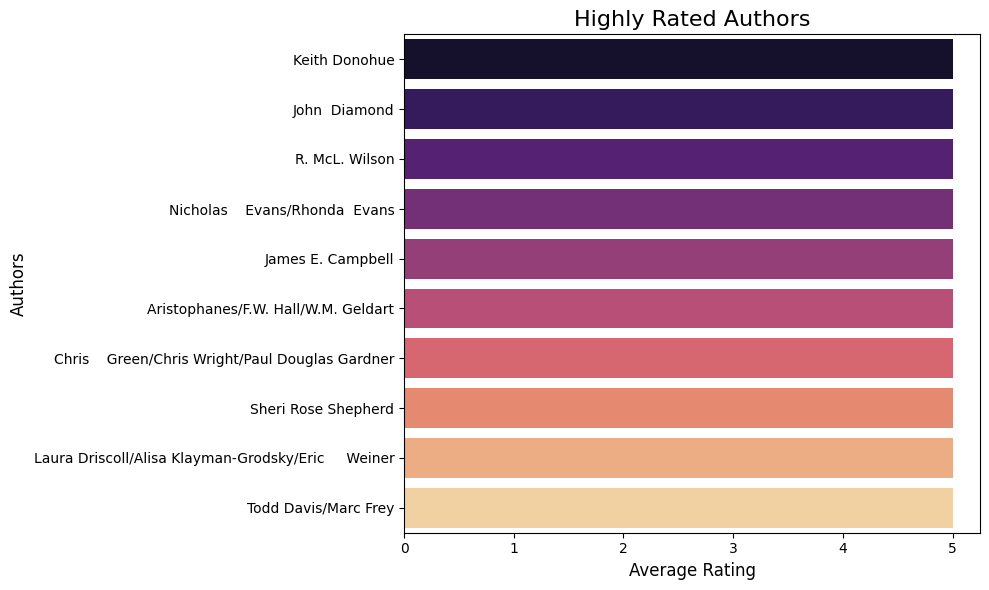

In [11]:
# Find authors with the highest average rating
author_ratings = data.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(10)

# Plot Highly Rated Authors
plt.figure(figsize=(10, 6))
sns.barplot(x=author_ratings.values, y=author_ratings.index, palette='magma')
plt.title('Highly Rated Authors', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Authors', fontsize=12)
plt.tight_layout()
plt.show()


** Author with the Most Books**

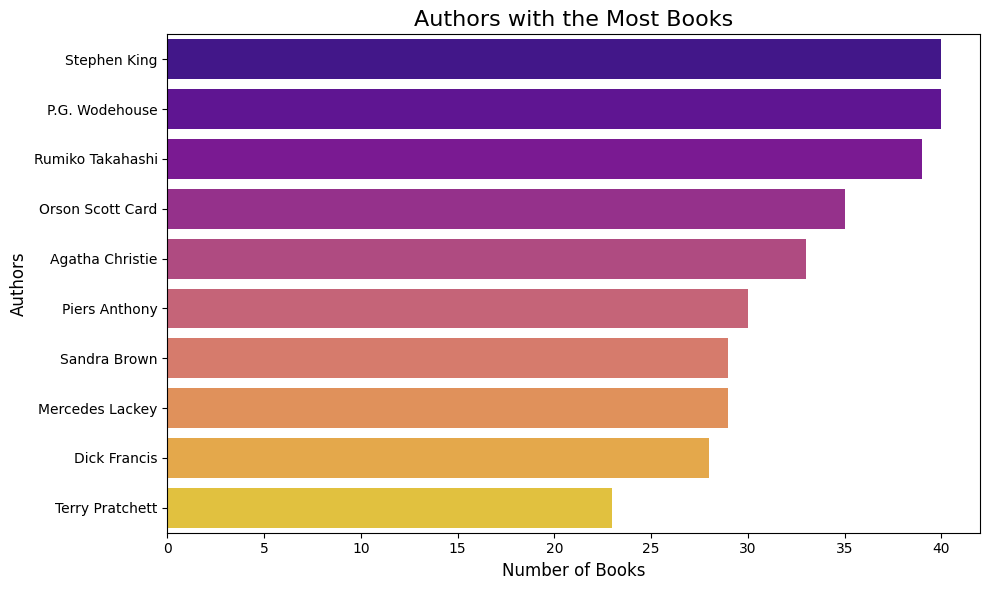

In [12]:

author_counts = data['authors'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='plasma')
plt.title('Authors with the Most Books', fontsize=16)
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Authors', fontsize=12)
plt.tight_layout()
plt.show()


**Average Rating Visualization**

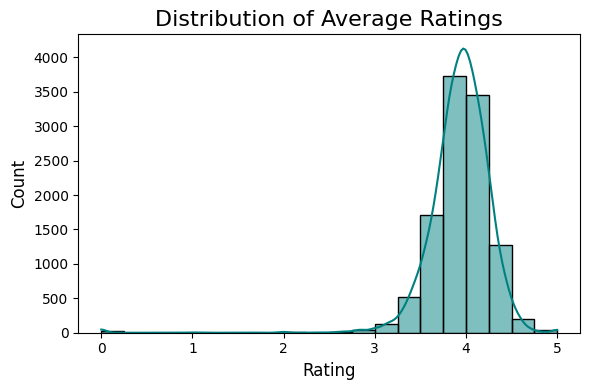

In [13]:

plt.figure(figsize=(6, 4))
sns.histplot(data['average_rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of Average Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


**Rating Ranges Visualization**

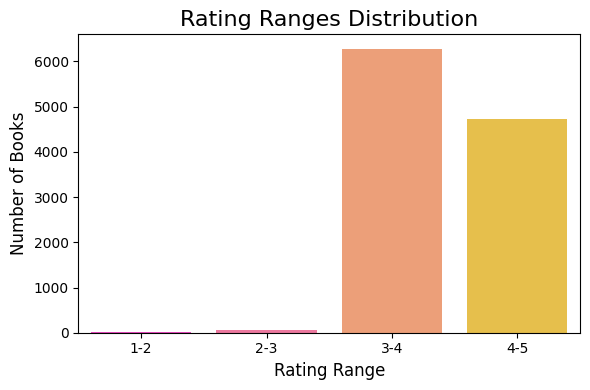

In [14]:

rating_bins = [0, 2, 3, 4, 5]
rating_labels = ['1-2', '2-3', '3-4', '4-5']
data['rating_range'] = pd.cut(data['average_rating'], bins=rating_bins, labels=rating_labels)

rating_range_counts = data['rating_range'].value_counts()


plt.figure(figsize=(6,4))
sns.barplot(x=rating_range_counts.index, y=rating_range_counts.values, palette='spring')
plt.title('Rating Ranges Distribution', fontsize=16)
plt.xlabel('Rating Range', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.tight_layout()
plt.show()


**Relationship between 'average_ rating' and 'ratings_count'**

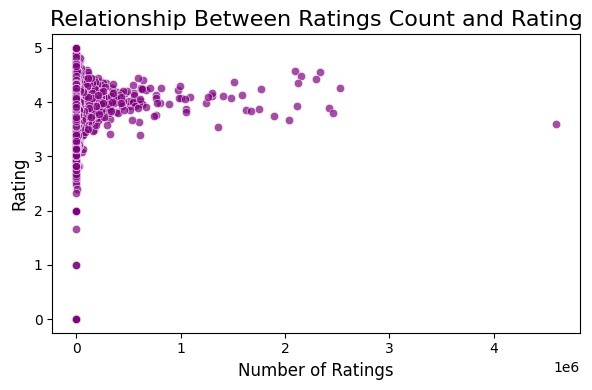

In [15]:

plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='ratings_count', y='average_rating', alpha=0.7, color='purple')
plt.title('Relationship Between Ratings Count and Rating', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


**Content Based Filtering**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combining features into a single string
data['combined_features'] = data['title'] + ' ' + data['authors']

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])


cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data[data['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    book_indices = [i[0] for i in sim_scores]
    return data.iloc[book_indices][['title', 'authors', 'average_rating']]


print(get_recommendations('The Great Gatsby'))


                                                    title  \
bookID                                                      
14376                                   Einstein's Dreams   
16799              The Best American Science Writing 2002   
2100                              The Future of Spacetime   
23392                                      Lost and Found   
23653                The Hobbit  or  There and Back Again   
35125                                               Alien   
30104                                           The Spell   
28466   ADHD in Adulthood: A Guide to Current Theory  ...   
23398                                             The Dig   
35178                                         Interlopers   

                                                  authors  average_rating  
bookID                                                                     
14376                                       Alan Lightman            4.07  
16799   Matt Ridley/Jesse Cohen/Alan Li

**Collaborative Filtering**

In [17]:
!pip install surprise

In [18]:
#Generate synthetic user IDs
np.random.seed(42)
data['user_id'] = np.random.randint(1, 1000, size=len(data))

In [19]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data[['user_id', 'bookID', 'average_rating']], reader)

algo = SVD()
cross_validate(algo, data_surprise, cv=5, verbose=True)

pred = algo.predict(uid=1, iid=2)  # Predict for user_id=1 and book_id=2
print(pred)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3302  0.3472  0.3523  0.3859  0.3614  0.3554  0.0183  
MAE (testset)     0.2370  0.2365  0.2416  0.2408  0.2390  0.2390  0.0020  
Fit time          0.46    0.34    0.30    0.33    0.25    0.33    0.07    
Test time         0.02    0.01    0.02    0.01    0.02    0.02    0.01    
user: 1          item: 2          r_ui = None   est = 4.13   {'was_impossible': False}


**Hybrid Model**

In [20]:
def hybrid_recommendation(user_id, book_title):
    content_recs = get_recommendations(book_title)
    collab_recs = [algo.predict(user_id, book_id).est for book_id in data['bookID']]
    data['collab_score'] = collab_recs
    hybrid_recs = data[['title', 'authors', 'average_rating', 'collab_score']]
    return hybrid_recs.sort_values(by='collab_score', ascending=False).head(10)

print(hybrid_recommendation(1, 'The Great Gatsby'))


                                                    title  \
bookID                                                      
24784   The Black Cauldron (The Chronicles of Prydain ...   
5104                                  The Handmaid's Tale   
98         What to Expect the First Year (What to Expect)   
39304                 The Forsaken (Vampire Huntress  #7)   
6311            Charlie and the Chocolate Factory: A Play   
16175                                  Queen of the Scene   
18017                                   Life at Blandings   
36666   Save the Date: A Spirituality of Dating  Love ...   
17830   Bulgakov's the Master and Margarita: The Text ...   
23625   The History of Middle-Earth Index (The History...   

                                                  authors  average_rating  \
bookID                                                                      
24784                                     Lloyd Alexander            4.13   
5104                                